SVM

In [2]:
import pandas as pd
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split

df = pd.read_csv('features.csv')
column_names = list(df.columns)
input_names = column_names[0:len(column_names)-1]
target_name = column_names[len(column_names)-1]
X = df[input_names]   # slice dataFrame to extract input variables
y = df[target_name]   # slice dataFrame to extract target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
clf = svm.SVC().fit(X_train, y_train)

y_pred = clf.predict(X_test)
# Let's examine one sample and the corresponding predictions
print('----- Sample case -----')
last_sample = X_test.loc[list(X_test.index)[-1]]
print(last_sample)
print('Predicted class:',y_pred[-1])
print('Actual class:', y_test.loc[list(y_test.index)[-1]])
print('-----------------------')


print('Calculate the accuracy using the test data')
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Cross Validation

----- Sample case -----
max         567.934405
min         439.017425
max_pos    1260.000000
min_pos    8308.000000
sd           28.820889
Name: 155, dtype: float64
Predicted class: L
Actual class: D
-----------------------
Calculate the accuracy using the test data
Accuracy: 0.42105263157894735


SVM
SVM Accuracy: 0.608


Text(0, 0.5, 'Accuracy')

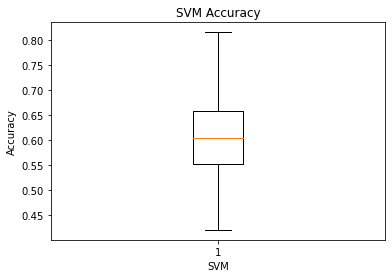

In [7]:
"""References
https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/
"""

import pandas as pd

from numpy import mean
from numpy import std

from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

import pickle

# SVM
df = pd.read_csv('event.csv')
column_names = list(df.columns)
input_names = column_names[0:len(column_names)-1]
target_name = column_names[len(column_names)-1]
X = df[input_names]   # slice dataFrame to extract input variables
y = df[target_name]   # slice dataFrame to extract target variable

model = svm.SVC().fit(X, y)
# save the model to disk
filename = 'svm.sav'
pickle.dump(model, open(filename, 'wb'))

print('SVM')

# Repeated 5-Fold Cross Validation
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
repeated_cv = RepeatedKFold(n_splits=5, n_repeats=50, random_state=123)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=repeated_cv, n_jobs=-1)
print("SVM Accuracy: {:.3f}".format(mean(scores)))

plt.boxplot(scores)
plt.title("SVM Accuracy")
plt.xlabel("SVM")
plt.ylabel("Accuracy")

KNN

In [3]:
import pandas as pd
from sklearn import metrics
from sklearn import neighbors
from sklearn.model_selection import train_test_split

df = pd.read_csv('event.csv')
column_names = list(df.columns)
input_names = column_names[0:len(column_names)-1]
target_name = column_names[len(column_names)-1]
X = df[input_names]   # slice dataFrame to extract input variables
y = df[target_name]   # slice dataFrame to extract target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
clf = neighbors.KNeighborsClassifier(5).fit(X_train, y_train)

y_pred = clf.predict(X_test)
# Let's examine one sample and the corresponding predictions
print('----- Sample case -----')
last_sample = X_test.loc[list(X_test.index)[-1]]
print(last_sample)
print('Predicted class:',y_pred[-1])
print('Actual class:', y_test.loc[list(y_test.index)[-1]])
print('-----------------------')

print('Calculate the accuracy using the test data')
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Cross Validation

----- Sample case -----
1        515.358229
2        515.294117
3        515.229540
4        515.164553
5        515.099214
            ...    
14997    509.152414
14998    510.176991
14999    509.198992
15000    509.218351
15001    509.235005
Name: 155, Length: 15001, dtype: float64
Predicted class: L
Actual class: D
-----------------------
Calculate the accuracy using the test data
Accuracy: 0.5789473684210527


KNN Accuracy: 0.414


Text(0, 0.5, 'Accuracy')

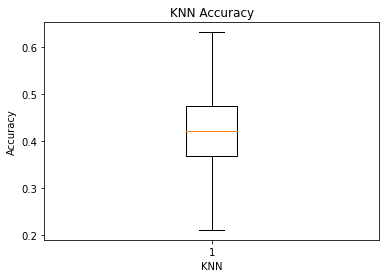

In [6]:
import pandas as pd

from numpy import mean
from numpy import std

from sklearn import metrics
from sklearn import neighbors

import matplotlib.pyplot as plt

df = pd.read_csv('event.csv')
column_names = list(df.columns)
input_names = column_names[0:len(column_names)-1]
target_name = column_names[len(column_names)-1]
X = df[input_names]   # slice dataFrame to extract input variables
y = df[target_name]   # slice dataFrame to extract target variable
model = neighbors.KNeighborsClassifier(3).fit(X, y)

# Repeated 5-Fold Cross Validation
repeated_cv = RepeatedKFold(n_splits=5, n_repeats=50, random_state=123)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=repeated_cv, n_jobs=-1)
print("KNN Accuracy: {:.3f}".format(mean(scores)))

plt.boxplot(scores)
plt.title("KNN Accuracy")
plt.xlabel("KNN")
plt.ylabel("Accuracy")

MLP

In [10]:
import pandas as pd
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('event.csv')
column_names = list(df.columns)
input_names = column_names[0:len(column_names)-1]
target_name = column_names[len(column_names)-1]
X = df[input_names]   # slice dataFrame to extract input variables
y = df[target_name]   # slice dataFrame to extract target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
clf = clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1).fit(X_train, y_train)

y_pred = clf.predict(X_test)
# Let's examine one sample and the corresponding predictions
print('----- Sample case -----')
last_sample = X_test.loc[list(X_test.index)[-1]]
print(last_sample)
print('Predicted class:',y_pred[-1])
print('Actual class:', y_test.loc[list(y_test.index)[-1]])
print('-----------------------')


print('Calculate the accuracy using the test data')
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

----- Sample case -----
1        515.358229
2        515.294117
3        515.229540
4        515.164553
5        515.099214
            ...    
14997    509.152414
14998    510.176991
14999    509.198992
15000    509.218351
15001    509.235005
Name: 155, Length: 15001, dtype: float64
Predicted class: U
Actual class: D
-----------------------
Calculate the accuracy using the test data
Accuracy: 0.19298245614035087


In [ ]:
!pip install freegames

In [ ]:
"""
References:
https://grantjenks.com/docs/freegames/simonsays.html
"""

from random import choice
from time import sleep
from turtle import *
import random
import time

from freegames import floor, square, vector

tiles = {
    vector(-50, 200): ('red', 'dark red'),
    vector(-50, -300): ('blue', 'dark blue'),
    vector(-400, -50): ('green', 'dark green'),
    vector(300, -50): ('yellow', 'khaki'),
    vector(-50, -50): ('grey', 'black')
}


def grid():
    """Draw grid of tiles."""
    square(-50, 200, 100, 'dark red')
    square(-50, -300, 100, 'dark blue')
    square(-400, -50, 100, 'dark green')
    square(300, -50, 100, 'khaki')
    square(-50, -50, 100, 'black')
    update()


def flash(tile):
    """Flash tile in grid."""
    glow, dark = tiles[tile]
    square(tile.x, tile.y, 100, glow)
    update()
    sleep(0.5)
    square(tile.x, tile.y, 100, dark)
    update()

def correct(tile):
  """Flash small green box"""
  glow, dark = tiles[tile]
  square(tile.x + 25, tile.y + 25, 50, 'green')
  update()
  sleep(1)
  square(tile.x + 25, tile.y, 50 + 25, dark)
  update()

def incorrect(tile):
  """Flash small red box"""
  glow, dark = tiles[tile]
  square(tile.x + 25, tile.y + 25, 50, 'red')
  update()
  sleep(1)
  square(tile.x + 25, tile.y + 25, 50, dark)
  update()


def streaming_classifier():
  # Stream and detect eye movement
  eye_movement = "up - down - left - right - or - blink"
  return eye_movement

def start():
  """Start game."""
  reaction_times = []
  print("Ready")
  sleep(1)
  print("Set")
  sleep(1)
  print("Go")
  sleep(1)
  
  while True:
    new_tile = random.choice(list(tiles))
    flash(new_tile)
    start_time = time.time()
    
    is_correct = False
    while is_correct == False:
      eye_movement = str(input("Direction (Up, Down, Left Right or Blink): ")).upper() # Use streaming_classifier()
      end_time = time.time()
      
      if eye_movement == "UP":
         reacted_tile = vector(-50, 200)
      elif eye_movement == "DOWN":
        reacted_tile = vector(-50, -300)
      elif eye_movement == "LEFT":
        reacted_tile = vector(-400, -50)
      elif eye_movement == "RIGHT":
        reacted_tile = vector(300, -50)
      elif eye_movement == "BLINK":
        reacted_tile = vector(-50, -50)
      elif eye_movement == "END PROGRAM":
        average_reaction_time = sum(reaction_times) / len(reaction_times)
        print("Average Reaction Time: {:.2f}s.".format(average_reaction_time))
        quit()
      else:
        print("No such eye movement.")

      end_time = time.time()  
    
      if reacted_tile == new_tile:
        is_correct = True
        correct(new_tile)
        print("Correct tile.")
      # else:
      #  incorrect(new_tile)
      #  print("Incorrect tile: try again.")
      #  flash(new_tile)
  
    reaction_time = end_time - start_time
    reaction_times.append(reaction_time)
    print("Reaction time: {:.2f}s.".format(reaction_time))
    # print()
    sleep(1)
  
setup(800, 600)
hideturtle()
tracer(False)
grid()
sleep(1)
start()
done()